# Pymaceuticals Inc.
---

### Analysis

Overall, it appears that Capomulin and Ramicane were the most effective at treating tumors. In the data below, these two treatments, grealy reduced the size of tumors in comparison to the other treatments. Additionally, Capomulin and Ramicane did have a slightly higher quantity of mice take these medicines. Gender doesn't appear much of a factor as the population is split pretty evenly as well with 51% of of the population being male and 49% is female.
 

In [1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/mayraterrazas/UCI-Folder/Module 5 Challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/mayraterrazas/UCI-Folder/Module 5 Challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")


# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = combined_mouse_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Tpoint. 
duplicate_mice = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989"]
all_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_mouse_df[combined_mouse_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_df["Mouse ID"].nunique()
clean_number_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
tumor_median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
tumor_variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
tumor_std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
tumor_sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()


# Assemble the resulting series into a single summary DataFrame.
stats_table = pd.DataFrame({"Mean of Tumor Vol.": tumor_mean,
                            "Median of Tumor Vol." : tumor_median,
                            "Variance of Tumor Vol." : tumor_variance,
                            "Std Dev of Tumor Vol." : tumor_std,
                            "Std Error of Tumor Vol." : tumor_sem})

stats_table


,Mean of Tumor Vol.,Median of Tumor Vol.,Variance of Tumor Vol.,Std Dev of Tumor Vol.,Std Error of Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
totals_per_regimen = clean_df["Drug Regimen"].value_counts()
totals_per_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

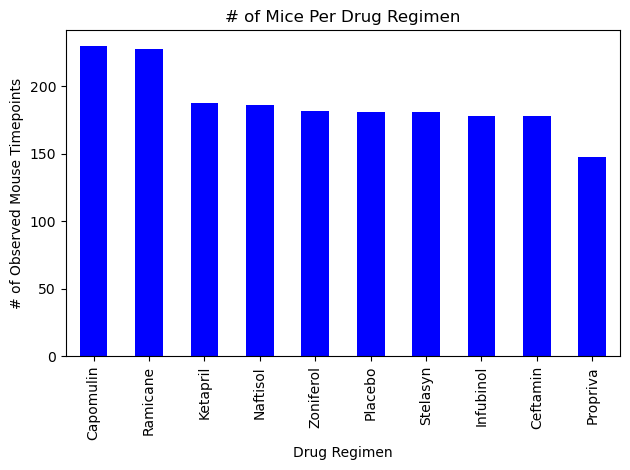

In [10]:
#pandas bar plot
panda_bar_plot = totals_per_regimen.plot(kind="bar",color="blue")
panda_bar_plot.set_xlabel("Drug Regimen")
panda_bar_plot.set_ylabel("# of Observed Mouse Timepoints")
panda_bar_plot.set_title("# of Mice Per Drug Regimen")

plt.tight_layout()
plt.show()

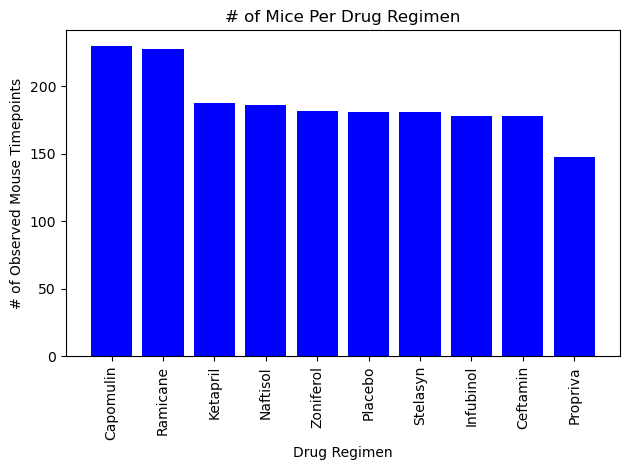

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = totals_per_regimen.index.values
y_axis = totals_per_regimen.values

plt.bar(x_axis, y_axis, color="blue", align="center")

plt.title("# of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()




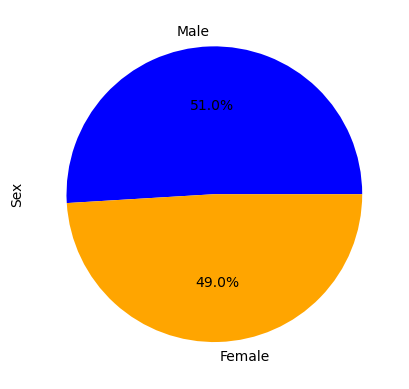

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_totals = clean_df["Sex"].value_counts()

colors = ["blue", "orange"]

gender_totals.plot.pie(colors=colors, autopct="%1.1f%%")

plt.show()



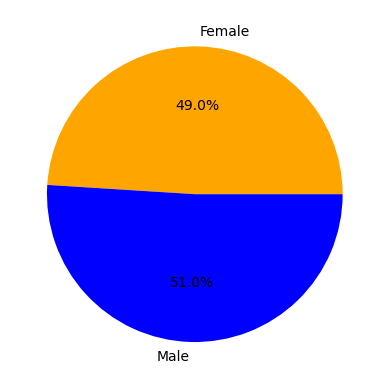

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [49, 51]
colors = ["Orange", "blue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]




In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [16]:
#Capomulin

cap_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
cap_vol = pd.DataFrame(cap_last)
cap_merge = pd.merge(cap_vol, clean_df, on=("Mouse ID", "Timepoint"),how="left")

cap_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
#Capomulin Continued

cap_tumors = cap_merge["Tumor Volume (mm3)"]
cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[.25]
cap_upperq = cap_quartiles[.75]
cap_iqr = cap_upperq - cap_lowerq


print(f"The lower quartile of Capoulin Tumors : {cap_lowerq}")
print(f"The upper quartile lof Capomulin tumors : {cap_upperq}")
print(f'The interquartile range of Capomulin tumors : {cap_iqr}')
print(f"The median of Capomulin tumors : {cap_quartiles[0.5]}")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of Capoulin Tumors : 32.37735684
The upper quartile lof Capomulin tumors : 40.1592203
The interquartile range of Capomulin tumors : 7.781863460000004
The median of Capomulin tumors : 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [18]:
#Ramicane

rami_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
rami_vol = pd.DataFrame(rami_last)
rami_merge = pd.merge(rami_vol, clean_df, on=("Mouse ID", "Timepoint"),how="left")

rami_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [19]:
#Ramicane Continued

rami_tumors = rami_merge["Tumor Volume (mm3)"]
rami_quartiles = rami_tumors.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[.25]
rami_upperq = rami_quartiles[.75]
rami_iqr = rami_upperq - rami_lowerq

print(f"The lower quartile of Ramicane tumors is : {rami_lowerq}")
print(f"The upper quartile of Ramicane tumors is : {rami_upperq}")
print(f"The interquartile range of Ramican tumors is : {rami_iqr}")
print(f"The median of Ramicane tumors is : {rami_quartiles[0.5]}")

rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)

print(f"Values below {rami_lower_bound} could be outliers")
print(f"Values above {rami_upper_bound} could be outliers")

The lower quartile of Ramicane tumors is : 31.56046955
The upper quartile of Ramicane tumors is : 40.65900627
The interquartile range of Ramican tumors is : 9.098536719999998
The median of Ramicane tumors is : 36.56165229
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers


In [20]:
#Infubinol

infu_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infu_vol = pd.DataFrame(infu_last)
infu_merge = pd.merge(infu_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

infu_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
#Infubinol Continued

infu_tumors = infu_merge["Tumor Volume (mm3)"]
infu_quartiles = infu_tumors.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[.25]
infu_upperq = infu_quartiles[.75]
infu_iqr = infu_upperq - infu_lowerq

print(f"The lower quartile of Infubinol tumors is: {infu_lowerq}")
print(f"The upper quartile of Infubinol tumors is: {infu_upperq}")
print(f"The interquartile range of Infubinol tumors is: {infu_iqr}")
print(f"The median of Infubinol tumors is: {infu_quartiles[0.5]} ")

infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)

print(f"Values below {infu_lower_bound} could be outliers.")
print(f"Values above {infu_upper_bound} could be outliers.")


The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
#Ceftamin

ceft_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceft_vol = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")

ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [23]:
#Ceftamin Continued

ceft_tumors = ceft_merge["Tumor Volume (mm3)"]
ceft_quartiles = ceft_tumors.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq

print(f"The lower quartile of treatment is: {ceft_lowerq}")
print(f"The upper quartile of temperatures is: {ceft_upperq}")
print(f"The interquartile range of temperatures is: {ceft_iqr}")
print(f"The the median of temperatures is: {ceft_quartiles[0.5]} ")

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


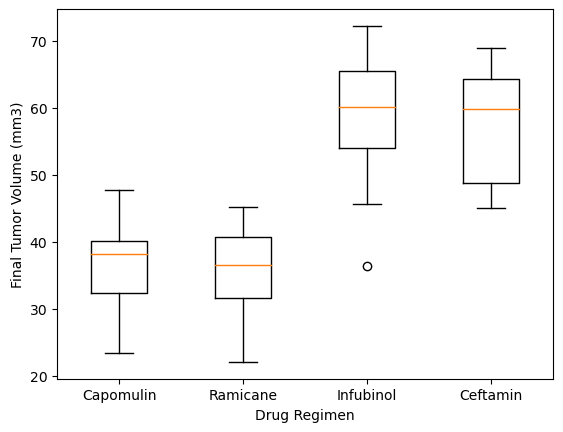

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments_to_plot = [cap_tumors, rami_tumors, infu_tumors, ceft_tumors]

ig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(treatments_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()


## Line and Scatter Plots

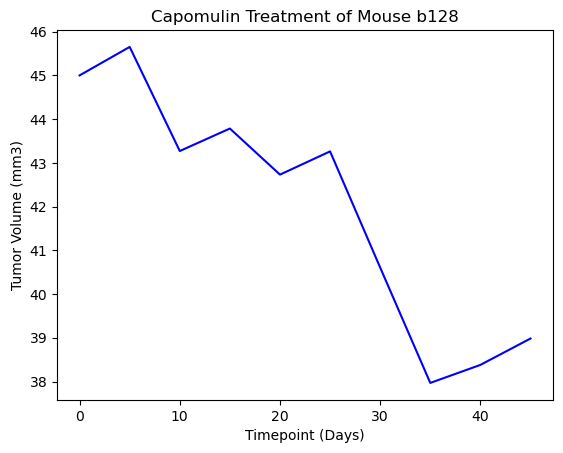

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot_df =capomulin_df.loc[capomulin_df["Mouse ID"] == "b128", :]

line_x_axis = line_plot_df["Timepoint"]
line_y_axis = line_plot_df["Tumor Volume (mm3)"]


plt.title("Capomulin Treatment of Mouse b128")
plt.plot(line_x_axis, line_y_axis, color="blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

/var/folders/xs/znfnqg_d4g76h6k2lhhk5mk80000gn/T/ipykernel_8727/1422573810.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap_vol = capomulin_df.groupby(['Mouse ID']).mean()


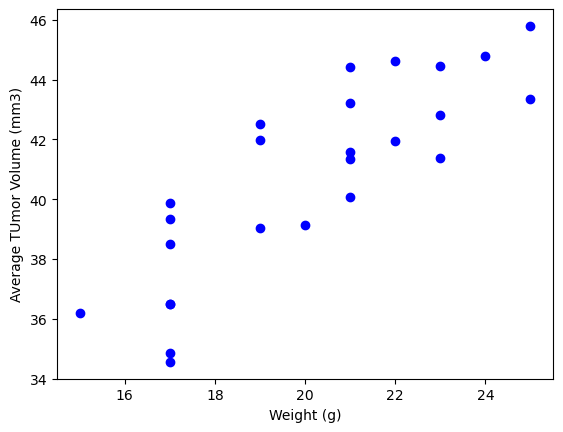

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_cap_vol = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average TUmor Volume (mm3)")
plt.show()


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


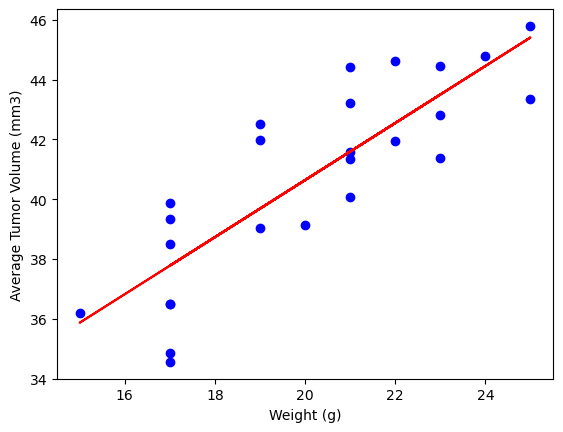

In [32]:
x_values = avg_cap_vol["Weight (g)"]
y_values = avg_cap_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq= "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color="blue")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
